***
### Dependencies:
This project code is written using
- tensorflow 2.6.0
- numpy 1.21.5

Older versions of tensorflow might not be able to execute the code properly
***

In [2]:
print("Importing the libraries...")
import warnings
from IPython.display import clear_output
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (classification_report,
                            confusion_matrix,
                            plot_confusion_matrix)
import seaborn as sns
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
clear_output(wait=True)
print("Libraries are imported.")

if not tf.__version__  == "2.6.0":
    warnings.warn(f"Tensorflow version {tf.__version__} is not compatible with '2.6.0'. Conflicts might occure while running the code")
if not np.__version__  == "1.21.5":
    warnings.warn(f"Numpy version {np.__version__} is not compatible with '1.21.5'. Conflicts might occure while running the code")

Libraries are imported.


In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
print("Shape of x_train_full", x_train_full.shape)
print("Shape of y_train_full", x_train_full.shape)
print("Shape of x_test", x_train_full.shape)
print("Shape of y_test", x_train_full.shape)

Shape of x_train_full (50000, 32, 32, 3)
Shape of y_train_full (50000, 32, 32, 3)
Shape of x_test (50000, 32, 32, 3)
Shape of y_test (50000, 32, 32, 3)


In [4]:
print("Number of classes available in CIFAR10 dataset:", len(np.unique(y_train_full)))
print("Available classes in CIFAR10 dataset:", np.unique(y_train_full))

Number of classes available in CIFAR10 dataset: 10
Available classes in CIFAR10 dataset: [0 1 2 3 4 5 6 7 8 9]


In [5]:
# Converting the labels to categorical values
print("Example before converting to categorical:", y_train_full.flatten()[0])
y_train_full_categorical = to_categorical(y_train_full.flatten())
y_test_categorical = to_categorical(y_test.flatten())
print("Example after converting to categorical:", y_train_full_categorical[0])

Example before converting to categorical: 6
Example after converting to categorical: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Here we will check weather the dataset is balanced or we have imbalance classes.

c:\Users\farza\anaconda3\envs\ieso_env_v9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The image shows that we are not dealing with the problem of imbalance dataset


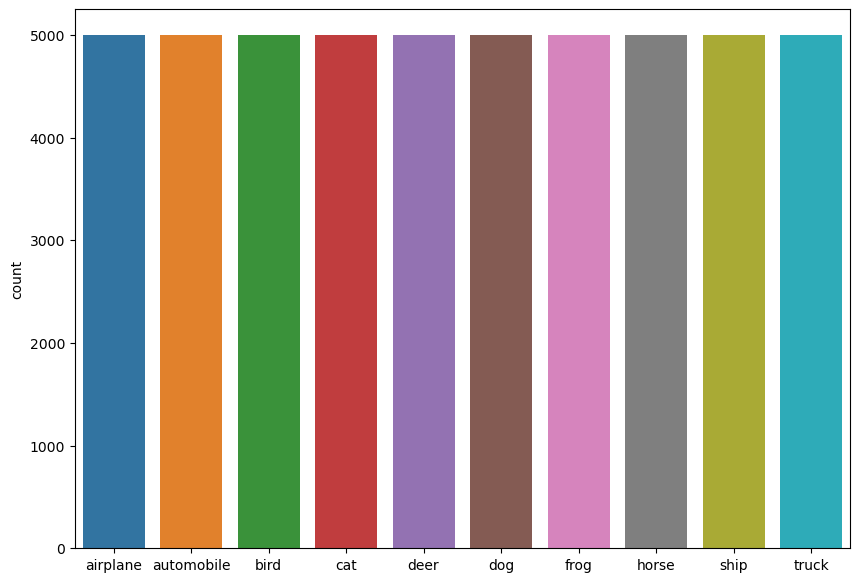

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,7))
p = sns.countplot(y_train_full.flatten())
p.set(xticklabels=classes)
print("The image shows that we are not dealing with the problem of imbalance dataset")

Here we will check weather the dataset is balanced or we have imbalance classes.

In [7]:
print("There is Nan value in x_train_full:", np.isnan(x_train_full).any())
print("There is Nan value in y_train_full:", np.isnan(y_train_full.flatten()).any())
print("There is Nan value in x_test:", np.isnan(x_test).any())
print("There is Nan value in y_train:", np.isnan(y_test.flatten()).any())

print("\nThere is no missing value in the dataset")

There is Nan value in x_train_full: False
There is Nan value in y_train_full: False
There is Nan value in x_test: False
There is Nan value in y_train: False

There is no missing value in the dataset


In [8]:
# normalizing the training data and spliting the data into trian and validation sets
print("min and max value of the original dataset are:", np.min(x_train_full), ",", np.max(x_train_full))
x_test = x_test / 255.0
x_valid = x_train_full[:5000] / 255.0
x_train = x_train_full[5000:] / 255.0
y_valid = y_train_full_categorical[:5000]
y_train = y_train_full_categorical[5000:]
print("min and max value of the normalized dataset are:", np.min(x_train), ",", np.max(x_train))

min and max value of the original dataset are: 0 , 255
min and max value of the normalized dataset are: 0.0 , 1.0


Plotting a sample image:
frog


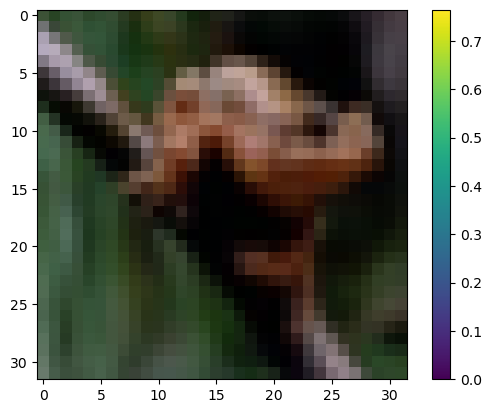

In [14]:
#Visualizing a sample
print("Plotting a sample image:")
print(classes[y_train_full.flatten()[0]])
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

plotting the fist 4 samples:


<Figure size 600x600 with 0 Axes>

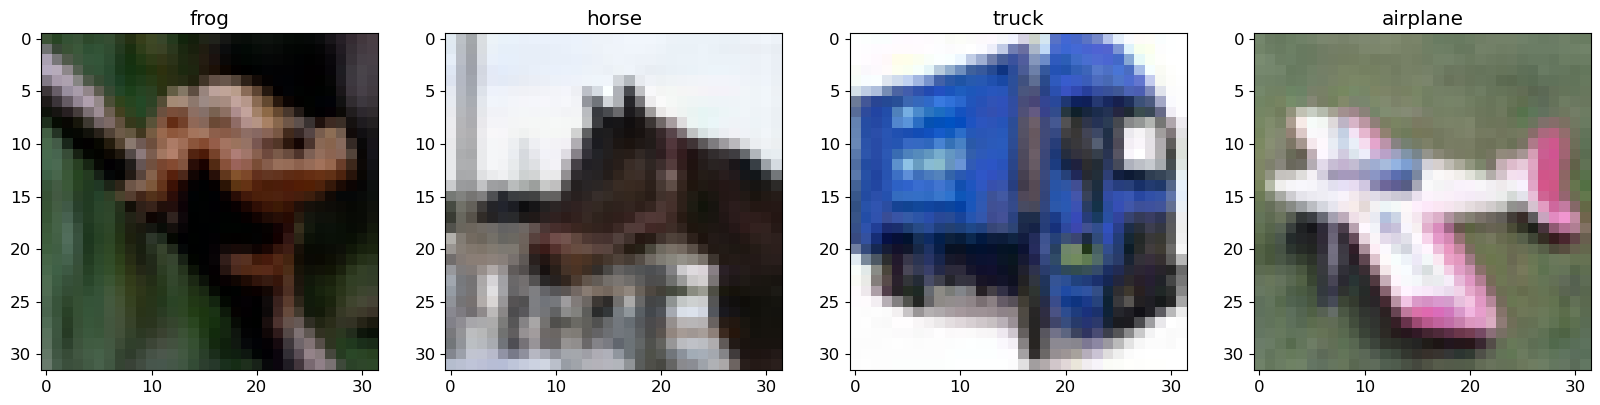

In [15]:
print("plotting the fist 4 samples:")
plt.figure(figsize=(6,6))
plt.rc('font', size=12)
x_train__ = x_train.reshape(x_train.shape[0], 32, 32, 3)
fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"{classes[digit]}")

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [17]:
model.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="min", # we need the minimum loss
        restore_best_weights=True,
     )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="min",
        min_lr=0.00001,
     )

num_batch_size = 1024
num_epochs = 20000

print(f"Optimizer, metrics, early stopping, learning rate reduction, number of batch size, and number of epochs were set.")

Optimizer, metrics, early stopping, learning rate reduction, number of batch size, and number of epochs were set.


In [18]:
# Training the model and evaluating the model
history = model.fit(
            x_train,
            y_train,
            batch_size=num_batch_size,
            epochs=num_epochs,
            verbose=1,
            callbacks=[callback, reduce_lr],
            validation_data=(x_valid, y_valid),
        )
test_loss, test_acc = model.evaluate(x_valid, y_valid, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/20000
44/44 [==============================] - 15s 108ms/step - loss: 2.1164 - accuracy: 0.2146 - val_loss: 1.8071 - val_accuracy: 0.3508
Epoch 2/20000
44/44 [==============================] - 3s 63ms/step - loss: 1.7519 - accuracy: 0.3648 - val_loss: 1.5384 - val_accuracy: 0.4542
Epoch 3/20000
44/44 [==============================] - 3s 63ms/step - loss: 1.5746 - accuracy: 0.4273 - val_loss: 1.3795 - val_accuracy: 0.5018
Epoch 4/20000
44/44 [==============================] - 3s 64ms/step - loss: 1.4647 - accuracy: 0.4693 - val_loss: 1.2784 - val_accuracy: 0.5414
Epoch 5/20000
44/44 [==============================] - 3s 64ms/step - loss: 1.3916 - accuracy: 0.4998 - val_loss: 1.1967 - val_accuracy: 0.5710
Epoch 6/20000
44/44 [==============================] - 3s 64ms/step - loss: 1.3196 - accuracy: 0.5253 - val_loss: 1.1288 - val_accuracy: 0.5960
Epoch 7/20000
44/44 [==============================] - 3s 64ms/step - loss: 1.2592 - accuracy: 0.5506 - val_loss: 1.1159 - val_accurac

In [19]:
print("history.params.keys():", history.params.keys())
print("Number of epochs:", len(history.epoch))
print("history.history.keys():", history.history.keys())

history.params.keys(): dict_keys(['verbose', 'epochs', 'steps'])
Number of epochs: 65
history.history.keys(): dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


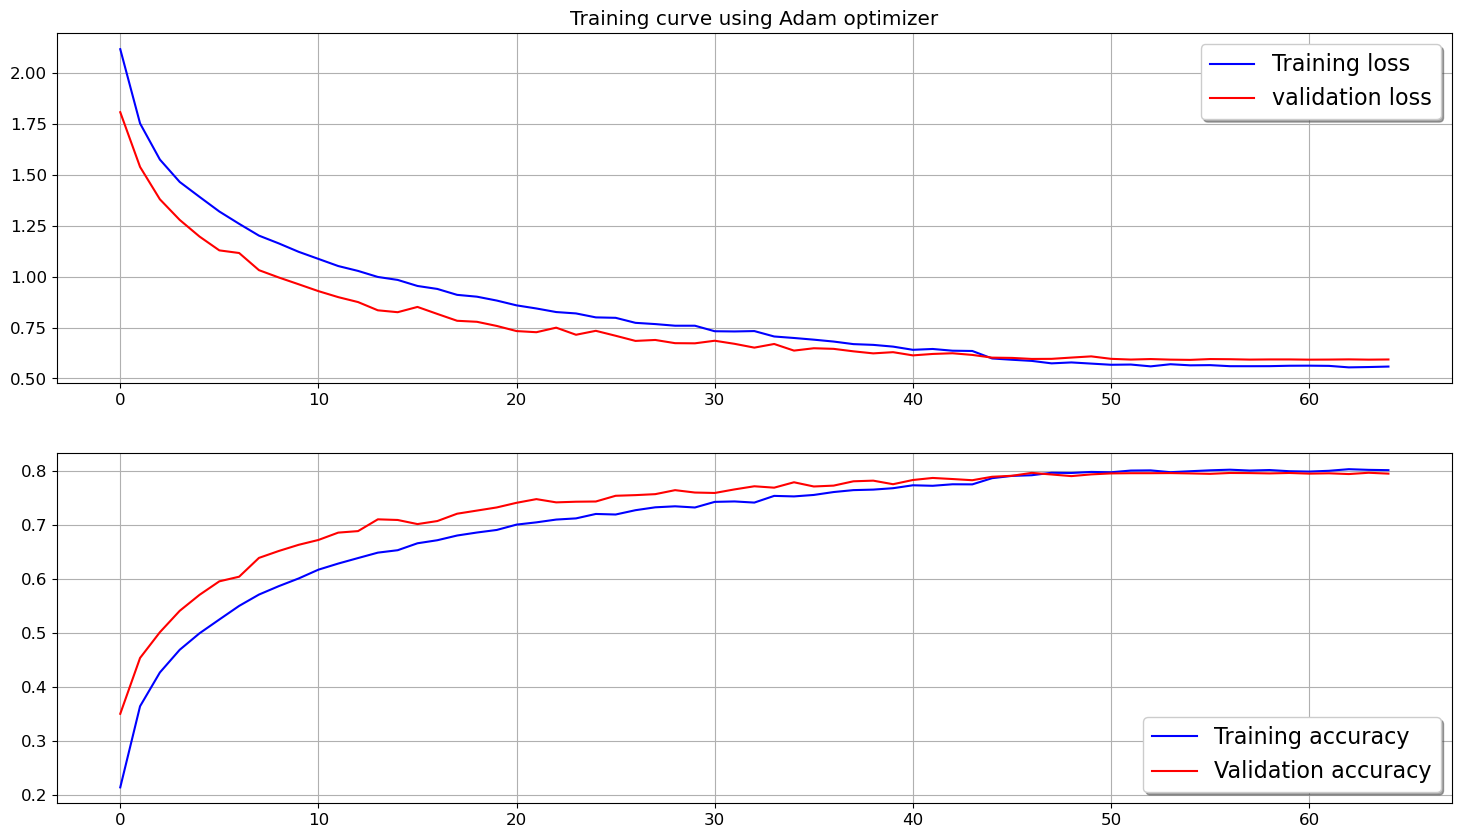

In [20]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
plt.rc('font', size=16)
ax[0].title.set_text("Training curve using Adam optimizer")
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].grid()
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].grid()

In [21]:
print("Evaluation of the model on the training set")
model.evaluate(x_train, y_train)

Evaluation of the model on the training set
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3178 - accuracy: 0.8999


[0.317808598279953, 0.8998666405677795]

In [22]:
print("Evaluation of the model on the validation set")
model.evaluate(x_valid, y_valid)

Evaluation of the model on the validation set
157/157 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.7956


[0.5912860035896301, 0.7955999970436096]

In [23]:
print("Evaluation of the model on the test set")
model.evaluate(x_test, y_test_categorical)

Evaluation of the model on the test set
313/313 [==============================] - 1s 3ms/step - loss: 0.6139 - accuracy: 0.7869


[0.6138935685157776, 0.786899983882904]

In [24]:
# Example: Predicting three samples
x_new = x_test[:3]
y_pred = model.predict(x_new)
print("Probability of predicted numbers:\n", y_pred)
print("Closest match for the predicted numbers:\n", np.argmax(y_pred, axis=1))

Probability of predicted numbers:
 [[3.6204263e-05 5.0748736e-06 1.4503860e-04 6.9931185e-01 1.6802653e-05
  2.9777551e-01 2.6197024e-03 7.3496660e-05 1.0742165e-05 5.5657065e-06]
 [4.8336300e-05 1.4003669e-02 2.1094329e-10 6.8186609e-11 8.6336385e-13
  1.3454670e-13 9.7853309e-11 4.3961226e-15 9.8593825e-01 9.8117080e-06]
 [1.8912837e-01 6.7331448e-02 2.2157753e-04 3.4352587e-04 4.4869405e-05
  5.8967325e-06 1.5060302e-05 2.9681369e-05 7.1241170e-01 3.0467873e-02]]
Closest match for the predicted numbers:
 [3 8 8]


In [35]:
# saving the model
model.save("cnn_cifar10_model.h5", save_format="h5")

In [26]:
# loading the model
model = tf.keras.models.load_model("cnn_cifar10_model.h5")

# making predictions on test images (all of them)
y_predict = model.predict(x_test)

# display prediction for the first seven image
print("Validation predicted values:", np.argmax(y_predict, axis=1)[:7])

#We can also print out a test label and see if prediction is correct
print("Validation true labels:", np.argmax(y_valid[:7], axis=1))

Validation predicted values: [3 8 8 0 4 6 1]
Validation true labels: [6 9 9 4 1 1 2]


In [28]:
# evaluating the model performance on test data
score = model.evaluate(x_test, y_test_categorical, verbose=0)
print('Test loss: {} %'.format(score[0] * 100))
print('Test accuracy: {} %'.format(score[1] * 100))

Test loss: 64.12804126739502 %
Test accuracy: 78.75000238418579 %


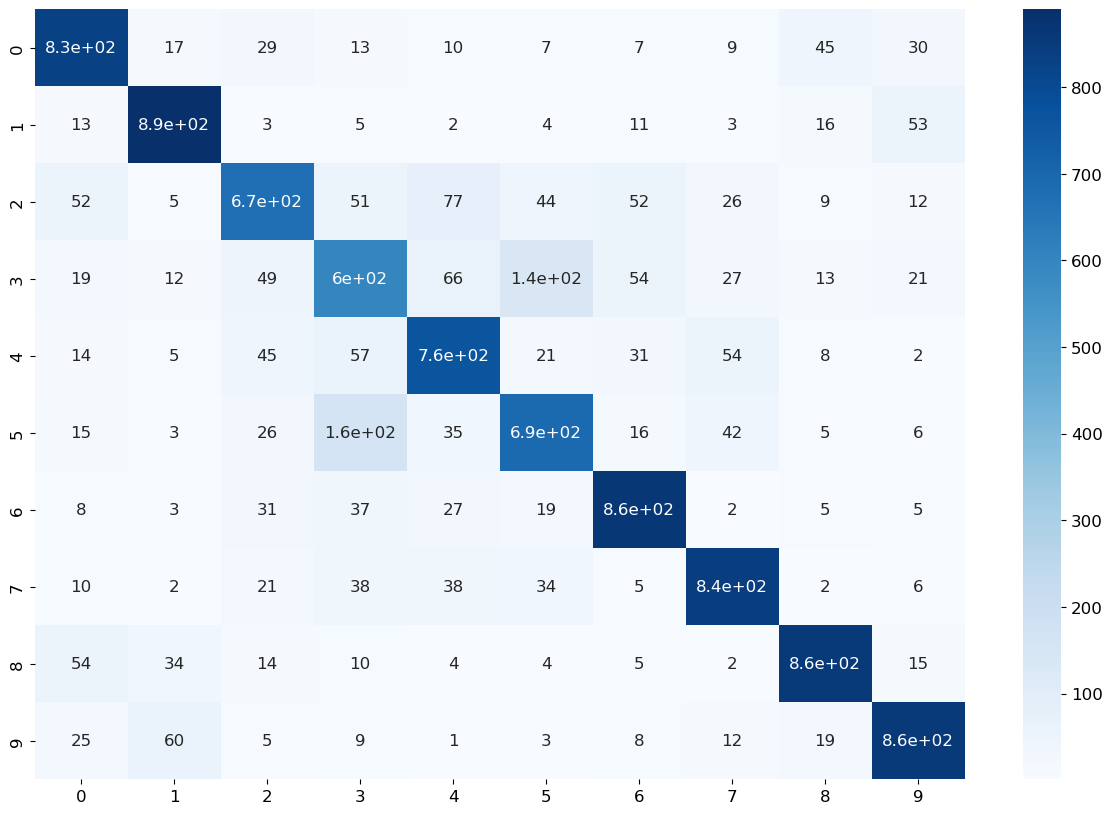

In [30]:
# checking the confusion matrix of all classes
plt.figure(figsize=(15,10))
plt.rc('font', size=12)
y_predict = model.predict(x_test)
cf_matrix = confusion_matrix(np.argmax(y_test_categorical, axis=1), np.argmax(y_predict, axis=1))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

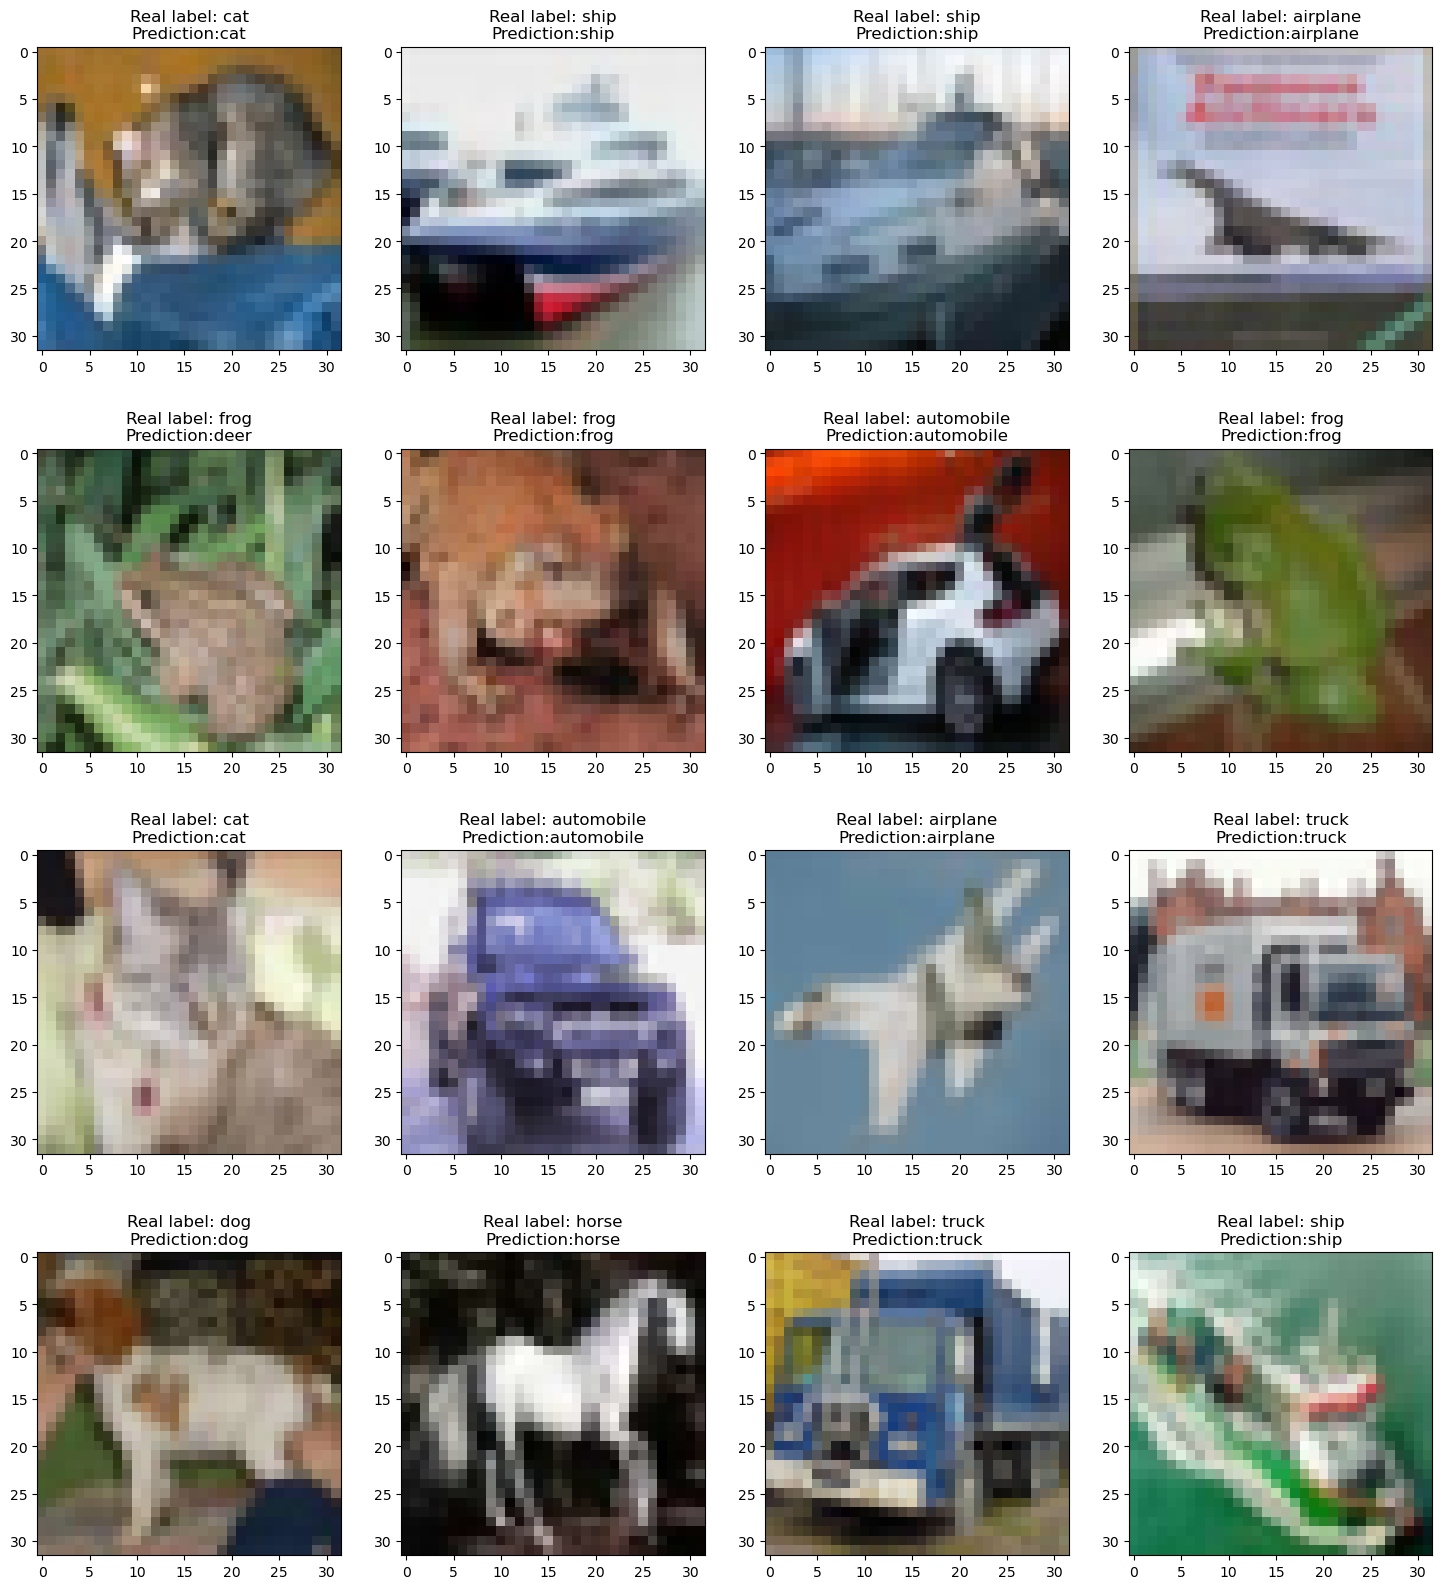

In [39]:
y_pred = model.predict(x_test)
# X_test__ = x_test.reshape(x_test.shape[0], 32, 32)
plt.rc('font', size=10)
fig, axis = plt.subplots(4, 4, figsize=(18, 20))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test[i], cmap='binary')
    ax.set(title = f"Real label: {classes[y_test_categorical[i].argmax()]}\nPrediction:{classes[y_pred[i].argmax()]}")

In [33]:
print(classification_report(np.argmax(y_test_categorical, axis=1), np.argmax(y_predict, axis=1)))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1000
           1       0.86      0.89      0.88      1000
           2       0.75      0.67      0.71      1000
           3       0.61      0.60      0.61      1000
           4       0.75      0.76      0.75      1000
           5       0.72      0.69      0.70      1000
           6       0.82      0.86      0.84      1000
           7       0.83      0.84      0.84      1000
           8       0.88      0.86      0.87      1000
           9       0.85      0.86      0.85      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [34]:
print("Model weights:")
print(model.get_weights())

Model weights:
[array([[[[-7.84542114e-02, -5.46440929e-02, -9.13835615e-02,
          -2.00288631e-02,  5.45386821e-02, -8.04779977e-02,
          -1.19657807e-01,  1.44079059e-01, -5.00188060e-02,
          -5.94536401e-02,  1.97716299e-02, -1.39555216e-01,
           7.64439330e-02, -3.05087846e-02, -8.27979371e-02,
          -6.69590160e-02, -1.10503715e-02, -3.66587006e-02,
          -3.58497202e-02, -6.03396520e-02, -6.92512514e-03,
           1.26709074e-01, -1.06530026e-01,  8.42874125e-02,
          -8.75727683e-02,  1.01930007e-01,  1.35177448e-01,
          -7.02893063e-02,  9.22828764e-02, -5.79584800e-02,
          -8.88504907e-02, -1.22361444e-01],
         [-1.43721700e-01, -1.55322269e-01,  1.01568706e-01,
           1.30752027e-01, -1.60180777e-02, -3.08781639e-02,
          -8.62720758e-02, -9.01460573e-02,  6.82839453e-02,
           6.20110817e-02,  1.06500119e-01, -3.55172530e-02,
           4.05988544e-02,  5.24298064e-02,  1.02314860e-01,
           1.10675918e-0